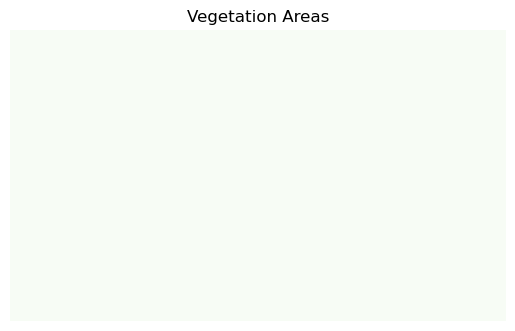

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the image path
image_path = os.path.join(os.getcwd(), 'data', 'images', 'vegetation_image_1.jpeg')  # Replace with your image path

# Load the image in grayscale mode and convert to RGB
gray_image = Image.open(image_path).convert('L')  # 'L' mode represents grayscale
image = gray_image.convert('RGB')  # Convert grayscale to RGB
rgb_array = np.array(image)

# Create a synthetic Near-Infrared (NIR) channel for demonstration
# Replace this with actual NIR data if available
nir_channel = rgb_array[:, :, 0]  # Example: Use the Red channel as synthetic NIR data

# Function to compute NDVI
def compute_ndvi(rgb, nir):
    """
    Compute NDVI (Normalized Difference Vegetation Index).
    
    Args:
        rgb (numpy array): RGB image as a NumPy array.
        nir (numpy array): NIR channel as a NumPy array.
    
    Returns:
        numpy array: NDVI values.
    """
    red = rgb[:, :, 0] / 255.0  # Normalize Red channel
    nir = nir / 255.0  # Normalize NIR channel
    ndvi = (nir - red) / (nir + red + 1e-6)  # Avoid division by zero
    return ndvi

# Compute NDVI
ndvi = compute_ndvi(rgb_array, nir_channel)

# Threshold NDVI to identify vegetation areas
ndvi_threshold = (ndvi > 0.3).astype(np.uint8)

# Visualize NDVI threshold
plt.imshow(ndvi_threshold, cmap="Greens")
plt.title("Vegetation Areas")
plt.axis("off")
plt.show()
